In [133]:
import requests
import os
import pandas as pd
import networkx as nx

tickers = [44598,118,66572,17799,17800,177156,73,74,27760,27759,27806,33197,30447,39682,35646,39683,28430,28431,124,123,9477,16371,27808,28887,28886,28885,30459,28888,28889,27909,131,304037,29628,17764,45230,133,134,16488,135,136,137,138,140,139,141,142,143,144,316756,100,101,102,18021,48903,41369,41479,27802,27803,15996,9248,29059,29060,157,28370,265683,82037,36362,168,326522,158,159,169,41480,41481,170,172,171,107,108,131341,109,13999,110,9761,173,174,175,178,177,111,113,112,35281,17338,15995,182,183,27755,98316,59129,231701,14963,199,200,27906,27907,140527,90039,204,45229,28600,28601,211,212,213,214,215,216,41228,41229,49714,49718,49715,49719,49720,49716,49721,49717,49722,217,40761,227,228,232,132079,27812,27811,80302,16112,51884,9086,370855,293599,293598,370853,293597,370856,285949,293600,370858,370852,293596,370851,370857,107340,51851,27765,27810,164132,187,27788,27787,236,237,28396,28397,239,240,41482,41483,188,189,190,17293,191,112867,41807,27813,27814,241,193,194,195,196,31135,41981,41982,27927,27928,244,51864,246,273,276,277,348820,348819,348822,348821,28376,281,27756,27757,252,27881,287,288,293,294,291,28543,28544,292,289,290,27768,27779,28372,28373,28584,28585,28586,28587,28588,28589,304,305,28590,28591,307,306,27753,27754,56478,28368,28369,310,311,308,309,316,317,27828,321,322,27965,27966,27967,27968,27969,27970,83941,258,257,28564,16128,32863,32340,161233,299415,299416,299417,327936,299413,299414,259951,259952,259953,259954,279096,279097,67765,32339,32342,32341,264,28576,28577,28578,28579,28580,28581,265,266,267,109824,419911,269,48800,48801,29037,51883,270,28411,28412,42052,42053,27740,431091,431092,42056,40089,27798,42605,61131,346,330,283676,298554,40087,42057,42663,42662,38822,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,109823,46551,89096,375810,316757,51850,27830,27831,27832,27833,336,15428,51856,231706,231707,34618,28423,138493,342,27834,27835,395,396,397,399,400,27915,27916,27917,27918,27919,27920,27921,27922,27923,27924,27925,27926,403,404,27766,27776,27795,27796,31351,383,51849,57307,247806,121191,29046,44517,388,9120,38756,17798,370303,157749,150226,250906,250907,415,416,391,392,393,394,96032,116056,133825,90176,15168,82036,424,66357,438,9249,182601,448,57591,265684,42055,79206,82986,41824,27885,27886,41825,36443,443,444,29038,125218,239032,263842,175669,55259,284845,17765,17766,278350,79287,445,239658,256172,15166,50968,446,157781,51921,43788,53333,376761,46805,51913,249348,44733,51942,53203,231699,343357,370304,260077,404395,51943,47065,28392,28393,464,465,27839,27840,466,467,41489,41490,65852,27744,27783,41488,41486,41487,470,65447,471,9976,389865,388229,79256,473,475,474,477,143108,478,479,51885,17810,488,489,490,37332,491,492,49273,49274,50956,50957,17107,16370,494,495,496,497,499,15662,231703,310336,231705,370854,264501,51887,460,27746,27751,506,461,69080,83024,95819,73034,87946,85762,54955,109748,87981,67182,55017,64989,149735,61245,70948,69783,70947,149736,64409,65854,69860,64990,74299,73033,74300,69435,85366,65665,69861,68543,69884,462,545,27841,27913,28343,548,550,28371,555,511,27964,27963,34936,558,559,560,561,28426,29055,29058,519,27816,27817,571,572,573,574,520,42049,521,525,528,529,49900,581,580,41491,27735,27872,27873,27807,27842,582,41810,534,28350,535,586,587,589,41809,28394,28395,591,592,69859,540,28436,28437,602,598,27730,599,605,606,607,608,541,542,611,612,614,38032,49583,615,28927,28676,47480,616,41969,41967,41968,48811,49088,41492,41493,27818,27819,28363,28364,620,619,621,622,127802,543,544,643,200335,14995,647,311936,64410,27741,27775,650,648,653,652,41230,40946,28360,660,659,161887,41496,41497,629,632,633,634,27843,27844,27910,27887,635,636,637,41498,666,31760,31761,832,17326,42385,833,838,28398,28399,840,841,41813,669,27845,27846,672,673,15557,854,49747,855,856,61457,84352,16349,9820,862,9060,35831,51876,17105,27888,27889,28335,79862,82984,27849,716,28563,192631,35101,879,28410,28413,881,880,41970,51353,893,46788,33490,27847,889,27971,27848,27734,891,892,9441,726,728,27905,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,49089,747,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,778,777,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,41499,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,36230,28325,28326,826,138531,41971,41972,35613,51860,108446,375564,905,182596,906,319658,39588,28414,28415,944,945,41973,940,27853,40846,909,910,40845,89382,913,915,916,917,948,28351,28407,28408,951,952,949,950,29702,27749,41974,27784,41975,957,35798,27851,27852,27738,27850,27747,962,963,927,928,29036,964,15813,27854,81204,81209,28545,965,47661,28508,28509,28510,28511,28512,967,968,969,28513,970,28514,28515,28516,28517,971,973,28449,974,28454,28455,28450,28451,28452,28453,975,28481,978,979,28327,54550,53204,67050,85461,984,42015,17763,17762,985,40762,43149,27771,27770,989,990,992,18048,1000,1001,993,241006,280122,284441,214103,17145,136964,285700,27729,41401,41402,28418,28419,1004,1005,27820,27772,45274,300848,1006,1007,27804,27805,76910,42084,67217,1013,41500,35502,35501,1014,91758,82953,192671,471406,392640,276243,318087,40833,28400,28401,1263,1264,1265,1266,41503,41504,57251,43712,208921,42051,1271,1273,1272,27762,27739,352917,51220,51221,47454,1275,41501,41814,41815,41816,41817,41818,41819,1019,46251,60069,1021,1022,1023,1024,1026,1027,1025,1028,1029,1030,1031,51886,1033,15018,67893,58629,1034,37247,80230,116057,1035,1036,70591,39670,89180,51923,120543,51881,120457,87940,1037,1038,51894,1039,1044,1041,1040,1042,1043,51915,37255,51324,370299,1045,51935,31603,229328,1046,14000,249180,293857,1047,1048,51896,51905,31064,1049,1050,1053,9265,1051,1052,31063,31062,1054,1055,51862,1056,38034,1057,40940,49569,51857,51940,64418,46522,36267,1058,1072,31082,158040,119793,52515,1059,1060,158039,1061,1062,1063,1064,1065,1066,1067,1068,51934,69991,1069,1070,1071,231698,51861,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,47417,37775,51930,51950,53332,1084,51951,51325,51326,51323,51906,51865,51924,51899,51874,51873,1085,51963,51897,51922,51868,30470,43360,40214,51909,52598,1086,51879,51290,231702,1087,43735,1088,1089,51960,31616,28603,48769,1091,49749,48766,60067,36849,51322,1090,51908,63511,68552,33759,51937,33758,61829,1092,51932,38821,1093,1094,41249,18029,370300,35832,1095,51945,1096,1097,31443,37256,1098,1099,49189,51911,370302,1101,10132,231694,51880,1102,49259,51617,51918,15047,28890,39684,1103,51867,51895,1104,1105,51822,34535,1106,32450,38033,30371,1107,1100,66464,46521,43709,1108,152694,33556,1109,51891,51866,51869,31084,51858,1110,31083,127713,51948,47416,1111,1112,1119,41404,1120,1121,9153,31065,1122,1123,1124,1125,1126,10133,1127,51888,1134,51321,51954,1128,1129,1130,1132,1131,51904,1133,44735,33195,1113,45571,51291,62499,28962,42988,1135,1114,1115,51898,1116,1136,16432,1137,60068,31617,51907,1117,1118,36517,51920,1139,231696,142918,1140,1141,1142,1143,1144,44504,44505,1145,68196,1138,51852,1146,231695,51910,1147,1148,1149,1150,30472,1154,1153,1151,1152,1155,1156,35928,51938,33418,1160,32155,28926,51941,51926,43711,43713,51958,1161,1162,60491,51957,43014,1164,30469,30471,1163,1165,51917,1166,1167,28604,51959,1168,51956,35285,1169,51955,51889,46543,51946,50789,1170,16606,1157,1158,1159,52027,31136,46012,51227,1171,67207,64417,1172,1184,1185,51949,1186,1187,53461,48767,1183,61827,47429,195903,51927,1173,1174,1175,1176,1177,1188,51893,1178,1179,51962,51928,1189,27974,17285,51966,1190,51892,1191,1182,1180,1181,1192,370301,52414,67115,52413,52424,52419,52418,53132,52409,52416,52411,52422,52421,52420,52415,52423,52417,30372,51964,1193,52599,38741,51936,51890,1194,1195,51944,31602,1196,69992,51863,9763,1197,31615,64451,1198,79288,264502,282370,31022,65853,36848,49923,1201,1202,1203,1204,1207,1208,1205,1209,1210,1206,1211,37254,1212,1213,1214,46737,41251,51953,1215,28602,51878,30299,316069,361985,1199,1200,31714,36847,49190,49191,1216,1217,1218,1219,1220,51961,51929,1222,1224,1223,1225,1221,47648,1226,51853,1227,61828,51919,27904,44503,51916,1228,42661,1229,41381,41370,48768,1230,51859,36266,1233,51939,1232,63510,31445,1231,51925,1235,17996,1238,1234,51854,1237,1236,9033,9390,17949,84353,39228,43806,1240,1241,41502,1279,103315,1281,1243,231700,351691,35956,1284,1285,1286,1287,1288,1289,27778,28409,17327,1294,58189,43367,48946,1297,28606,43807,1246,1247,1248,1300,27731,27752,30375,1250,1251,51931,1252,1254,1255,1256,1257,1352,1353,1303,27911,27912,1304,1359,35301,28353,1308,1307,27895,27890,46667,33408,245559,62535,30373,1310,46596,28416,28417,61060,103666,327296,59991,1311,1312,28607,202923,82985,304504,299434,1360,1361,1362,1363,1364,1365,1366,1367,1368,302658,82995,240455,246460,248542,251894,252040,253778,265097,51871,51872,51967,69883,28331,28332,28333,28334,1326,1327,58324,58325,120395,68379,1370,33481,17794,182597,182598,1372,28427,31085,1334,1373,240446,54102,54103,225741,297318,223552,1383,1384,36376,36377,36378,36379,36380,36381,36382,36383,36384,36385,36386,36387,36388,36389,36390,36391,27733,27748,27855,27856,49258,1385,1386,1380,1381,1337,1338,243319,241079,241080,240532,299418,297319,264549,243318,448424,448422,481282,481283,448423,475072,58323,1341,80286,246271,33198,16407,31679,36571,48895,63600,1389,30298,57601,58322,1402,1393,41334,41929,28561,114482,17328,137781,212947,316758,28404,1413,1412,82019,28303,27857,27858,27777,27767,27859,27860,40765,40766,27972,27973,27743,27799,248949,27800,27801,41494,41495,28329,41339,41340,28330,27791,27792,27789,27790,133839,107269,27764,27780,120783,471968,136983,231704,293335,107244,1463,28546,1464,182599,54930,68942,91014,317219,27862,27861,1467,27745,1465,1466,258193,17106,1469,259616,1479,1476,275963,9808,39756,40947,46738,45199,28424,28425,1418,27865,27864,27866,27867,27868,27869,1419,1420,84206,9251,16114,1492,1493,1494,27896,27863,1487,1488,32947,1495,1496,1498,17797,1497,1502,1503,82916,1506,30018,40779,51933,1434,28405,28406,28386,28387,1509,1510,1511,1512,119195,246840,355756,356296,28344,1515,42082,293245,175242,1516,42081,1437,310778,28428,28429,1526,1527,1528,1529,1445,9252,1530,27908,1536,9391,9087,1448,1542,1543,17240,354837,349614,349613,31023,73224,1600,1545,28361,28362,1606,1607,1604,1605,1547,41820,41821,1608,1609,30463,1610,1612,1613,1614,1615,28388,28389,1624,1625,1622,1623,1549,1554,28547,28548,1557,1558,1559,28518,28519,28520,28521,28522,28523,28524,1551,1552,1553,1560,1561,1562,1563,1564,1565,28549,28550,28551,1566,28525,28526,28527,1567,1568,28592,28477,28593,28478,28468,28479,28469,28480,28470,28594,28471,28472,28473,28474,28475,28476,1570,1571,1572,1573,1575,28483,28501,28484,28502,28485,28503,28486,28504,28487,28505,28488,28506,28489,28507,28490,28491,28492,28493,28494,28495,28496,28497,28498,28499,28500,1576,28439,28440,28441,28442,28443,28444,28445,28582,1577,1578,1579,28438,28552,28553,28554,28555,28556,28557,28558,28559,28560,1580,1582,28456,28457,28458,28459,28460,28461,28462,28463,28583,1584,1585,1586,1587,28464,28465,28466,28467,28572,28573,1626,40778,231693,1588,231692,41505,41811,41812,32421,41279,1593,59801,30648,32451,32452,136981,192485,83452,83453,83777,83804,83805,82934,83798,83799,83797,83795,27736,27737,1638,1639,27891,27892,27761,1640,1641,1598,1599,83843,41822,35278,31759,1658,160782,65189,85733,66489,1645,1646,1647,29054,51120,44507,35282,40684,41252,17118,85764,85765,1648,14964,14965,9937,63579,14966,43015,33196,42054,37269,37270,1660,27824,27825,1659,345243,113419,315848,61741,65892,28366,28367,27781,27782,1665,1681,27769,27875,27876,28390,28391,1683,1684,1688,1689,33749,34898,27826,27827,41930,208920,1691,1692,27713,1693,1694,33760,1670,1690,51912,27878,1701,1702,41980,17760,17761,27879,27880,27758,37444,37445,1706,45200,284439,284440,284442,16589,284437,284438,16588,16590,1678,27809,27897,28337,1664,41976,41977,41978,41979,27877,1718,27829,41403,51965,51855,16369,1710,16113,1711,367384,51952,367385,367387,51870,316754,316753,316755,51882,367386,42083,367389,367388,367390,43023,13955,56692,37859,1712,30448,31618,28324,27836,28352,27837,27838,41965,41966,80134,89181,1733,1734,35055,1745,1748,1738,1739,27943,27944,27945,27946,27947,27948,27949,27950,27951,27952,27953,27954,27955,27956,27957,27958,27959,27960,27961,27962,27929,27930,27931,27932,27933,27934,27935,27936,27937,27938,27939,27940,27941,27942,1741,28402,28403,27870,27871,1759,1760,1757,1758,1763,1765,1764,41959,27763,27815,136170,1767,1768,1749,41484,41485,1750,1753,1754,1755,37883,423334,231697,41960,27773,27821,27785,27786,41808,27822,27823,28328,27794,214131,69042,1786,16408,16409,30082,41962,41963,41964,41961,41231,152928,296773,27732,27884,51877,1801,1802,51875,1803,1805,28323,27750,27914,107301,102192,27742,27774,27893,27894,1796,1797,1798,27874,44777,28562,1818,1820,1811,1812,1813,27882,27883,27793,27797,1828,1826,1827,28374,28375,34958,1830,1831,41823]

print(len(tickers))

2325


Скачиваем данные 2325 компаний

In [135]:
get_request_url = "https://mfd.ru/export/handler.ashx/tiker.txt?TickerGroup=16&Tickers={}&Alias=false&Period=7&timeframeValue=1&timeframeDatePart=day&StartDate=01.01.2022&EndDate=31.12.2022&SaveFormat=0&SaveMode=1&FileName=tiker.txt&FieldSeparator=%253b&DecimalSeparator=.&DateFormat=yyyyMMdd&TimeFormat=HHmmss&DateFormatCustom=&TimeFormatCustom=&AddHeader=true&RecordFormat=0&Fill=true"

In [136]:
for ticker in tickers:
    request = requests.get(get_request_url.format(ticker))
    newFile = open(f"data_parse/{ticker}.txt", "wb+")
    newFile.write(request._content)
    newFile.flush()
    newFile.seek(0)
    # dfs[ticker] = pd.read_csv(newFile, **option)
    newFile.close()

In [129]:


# Путь к директории с файлами
dir_path = 'data_parse'

# Список файлов в директории
file_list = os.listdir(dir_path)

# Создание пустого DataFrame
df = pd.DataFrame()

# Цикл по всем файлам в директории
for file in file_list:
    # Проверка, что файл имеет расширение .csv
    if file.endswith('.txt'):
        # Чтение файла и добавление его содержимого в DataFrame
        file_path = os.path.join(dir_path, file)
        temp_df = pd.read_csv(file_path, delimiter=";")
        df = pd.concat([df, temp_df], ignore_index=True)

In [132]:
len(df["<TICKER>"].unique())

58

In [63]:


# Путь к директории с файлами
dir_path = 'data_stocks'

# Список файлов в директории
file_list = os.listdir(dir_path)

# Создание пустого DataFrame
df = pd.DataFrame()

# Цикл по всем файлам в директории
for file in file_list:
    # Проверка, что файл имеет расширение .csv
    if file.endswith('.txt'):
        # Чтение файла и добавление его содержимого в DataFrame
        file_path = os.path.join(dir_path, file)
        temp_df = pd.read_csv(file_path, delimiter=";")
        df = pd.concat([df, temp_df], ignore_index=True)

In [64]:
len(df)

7138

In [65]:
df["<TICKER>"].unique()

array(['НКХП ао', 'НЛМК ао', 'НМТП ао', 'Новатэк ао', 'РусГидро',
       'Русгрэйн', 'Русолово', 'Роснефть', 'Россети', 'Россети ао',
       'Россети ап', 'Россети СК', 'РоссЦентр', 'Электрцинк',
       'Нижкамшина', 'МТС-ао', 'Распадская', 'РБК ао', 'БурЗолото',
       'Ренессанс'], dtype=object)

In [66]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<AMOUNT>,<VOLUME>
0,НКХП ао,D,20220425,0,315.00,320.00,303.00,303.00,2690,840925.0
1,НКХП ао,D,20220426,0,310.50,310.50,300.00,305.50,1780,543990.0
2,НКХП ао,D,20220427,0,306.00,322.50,304.50,320.00,4210,1326585.0
3,НКХП ао,D,20220428,0,320.00,322.00,313.50,314.00,2280,721660.0
4,НКХП ао,D,20220429,0,313.50,315.50,295.00,304.50,9070,2771900.0
...,...,...,...,...,...,...,...,...,...,...
7133,Ренессанс,D,20230422,0,65.38,65.38,65.38,65.38,0,0.0
7134,Ренессанс,D,20230423,0,65.38,65.38,65.38,65.38,0,0.0
7135,Ренессанс,D,20230424,0,65.02,65.52,63.20,65.46,635550,41035793.8
7136,Ренессанс,D,20230425,0,65.46,66.68,65.10,66.12,467870,30910532.0


In [3]:
import pandas as pd

first = pd.read_csv("data_stocks/mfdexport_1dayzz (1).txt", delimiter=";")

first

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<AMOUNT>,<VOLUME>
0,БурЗолото,D,20220425,0,977,990,960,964,755,734090
1,БурЗолото,D,20220426,0,964,987,921,960,1145,1089208
2,БурЗолото,D,20220427,0,961,987,950,987,569,552783
3,БурЗолото,D,20220428,0,987,987,962,964,220,215130
4,БурЗолото,D,20220429,0,984,1016,966,990,1923,1910209
...,...,...,...,...,...,...,...,...,...,...
362,БурЗолото,D,20230422,0,1290,1290,1290,1290,0,0
363,БурЗолото,D,20230423,0,1290,1290,1290,1290,0,0
364,БурЗолото,D,20230424,0,1293,1298,1281,1286,975,1256471
365,БурЗолото,D,20230425,0,1296,1297,1276,1278,491,631382


In [34]:
df["<CLOSE>"][4]

304.5

In [104]:
len(df["<TICKER>"].unique())


16

In [105]:
from scipy.stats import pearsonr

In [98]:
import networkx as nx

# # загрузка данных из файла
# df = pd.read_csv('quotes.csv', sep='\t')

# создание графа
G = nx.Graph()

# добавление вершин (акций)
tickers = df['<TICKER>'].unique()
for ticker in tickers:
    G.add_node(ticker)

# добавление ребер (корреляций)
corr_threshold = 0.6 # пороговое значение коэффициента корреляции
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        ticker1 = tickers[i]
        
        ticker2 = tickers[j]
        print(ticker1, ticker2)
        x = df[df['<TICKER>']==ticker1]['<CLOSE>']
        y = df[df['<TICKER>']==ticker2]['<CLOSE>']
        corr, _ = pearsonr(x, y)
        # corr = df[df['<TICKER>']==ticker1]['<CLOSE>'].corr(df[df['<TICKER>']==ticker2]['<CLOSE>'])
        print(corr)
        if corr > corr_threshold:
            G.add_edge(ticker1, ticker2, weight=corr)

# поиск максимальных клик
cliques = list(nx.find_cliques(G))
max_cliques = [c for c in cliques if len(c)==max([len(c) for c in cliques])]

# вывод результатов
print('Рыночный граф акций российских компаний:')
print(G.edges(data=True))
print('Максимальные клики:')
for clique in max_cliques:
    print(clique)

НКХП ао НЛМК ао
0.5132504503711466
НКХП ао НМТП ао
0.9251470241096332
НКХП ао Новатэк ао
0.47557222319858866
НКХП ао РусГидро
0.6818165193923093
НКХП ао Русгрэйн
0.46474548920356196
НКХП ао Русолово
-0.6274243366003649
НКХП ао Роснефть
0.6596748185538981
НКХП ао Россети СК
0.5482525155180502
НКХП ао РоссЦентр
0.5926490193652478
НКХП ао Электрцинк
0.33900182222461217
НКХП ао Нижкамшина
0.818498370974386
НКХП ао МТС-ао
0.6538107376367486
НКХП ао Распадская
0.3243828502245699
НКХП ао БурЗолото
0.7570487474751236
НКХП ао Ренессанс
0.46016627937787624
НЛМК ао НМТП ао
0.6144699360748571
НЛМК ао Новатэк ао
0.05155746060342552
НЛМК ао РусГидро
0.7045927887347548
НЛМК ао Русгрэйн
0.7694412162121766
НЛМК ао Русолово
-0.006407851029354386
НЛМК ао Роснефть
0.8485017730724106
НЛМК ао Россети СК
0.7596325224014491
НЛМК ао РоссЦентр
0.415183707245048
НЛМК ао Электрцинк
-0.2847176245829371
НЛМК ао Нижкамшина
0.2462100806414884
НЛМК ао МТС-ао
0.41140916325594207
НЛМК ао Распадская
0.8495674446092083
НЛ

In [102]:
max_cliques

[['Русгрэйн', 'Роснефть', 'Распадская', 'НЛМК ао'],
 ['НМТП ао', 'Роснефть', 'РусГидро', 'НКХП ао'],
 ['НМТП ао', 'Роснефть', 'РусГидро', 'НЛМК ао'],
 ['НМТП ао', 'Роснефть', 'Россети СК', 'НЛМК ао'],
 ['НМТП ао', 'МТС-ао', 'РусГидро', 'НКХП ао'],
 ['НМТП ао', 'БурЗолото', 'Нижкамшина', 'НКХП ао'],
 ['Распадская', 'Роснефть', 'Россети СК', 'НЛМК ао']]

In [53]:
import numpy as np

In [95]:
df[df['<TICKER>']=="РБК ао"] = np.nan

In [94]:
df[df['<TICKER>']=="РБК ао"]

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<AMOUNT>,<VOLUME>
6038,РБК ао,D,20220425,0,2.802,2.816,2.722,2.750,153700,423320.6
6039,РБК ао,D,20220426,0,2.740,2.792,2.730,2.784,215000,594616.2
6040,РБК ао,D,20220427,0,2.786,2.810,2.722,2.792,282900,786892.4
6041,РБК ао,D,20220428,0,2.790,2.828,2.578,2.658,430500,1161700.8
6042,РБК ао,D,20220429,0,2.690,2.800,2.690,2.776,255200,700013.6
...,...,...,...,...,...,...,...,...,...,...
6399,РБК ао,D,20230421,0,2.728,2.728,2.728,2.728,0,0.0
6400,РБК ао,D,20230422,0,2.728,2.728,2.728,2.728,0,0.0
6401,РБК ао,D,20230423,0,2.728,2.728,2.728,2.728,0,0.0
6402,РБК ао,D,20230424,0,2.728,2.728,2.728,2.728,0,0.0


In [74]:
df.isna()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<AMOUNT>,<VOLUME>
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7133,False,False,False,False,False,False,False,False,False,False
7134,False,False,False,False,False,False,False,False,False,False
7135,False,False,False,False,False,False,False,False,False,False
7136,False,False,False,False,False,False,False,False,False,False


In [96]:
df.dropna(axis=0, how="any")

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<AMOUNT>,<VOLUME>
0,НКХП ао,D,20220425,0,315.00,320.00,303.00,303.00,2690,840925.0
1,НКХП ао,D,20220426,0,310.50,310.50,300.00,305.50,1780,543990.0
2,НКХП ао,D,20220427,0,306.00,322.50,304.50,320.00,4210,1326585.0
3,НКХП ао,D,20220428,0,320.00,322.00,313.50,314.00,2280,721660.0
4,НКХП ао,D,20220429,0,313.50,315.50,295.00,304.50,9070,2771900.0
...,...,...,...,...,...,...,...,...,...,...
7133,Ренессанс,D,20230422,0,65.38,65.38,65.38,65.38,0,0.0
7134,Ренессанс,D,20230423,0,65.38,65.38,65.38,65.38,0,0.0
7135,Ренессанс,D,20230424,0,65.02,65.52,63.20,65.46,635550,41035793.8
7136,Ренессанс,D,20230425,0,65.46,66.68,65.10,66.12,467870,30910532.0


In [97]:
df = df.dropna(axis=0, how="any")

In [101]:
df.to_csv("valid_data_stocks.csv", index=False)

In [80]:
df[df['<TICKER>']=="НКХП ао"]['<CLOSE>']

0      303.0
1      305.5
2      320.0
3      314.0
4      304.5
       ...  
362    394.0
363    394.0
364    398.0
365    397.0
366    398.0
Name: <CLOSE>, Length: 367, dtype: float64

In [99]:
len(max_cliques)

7

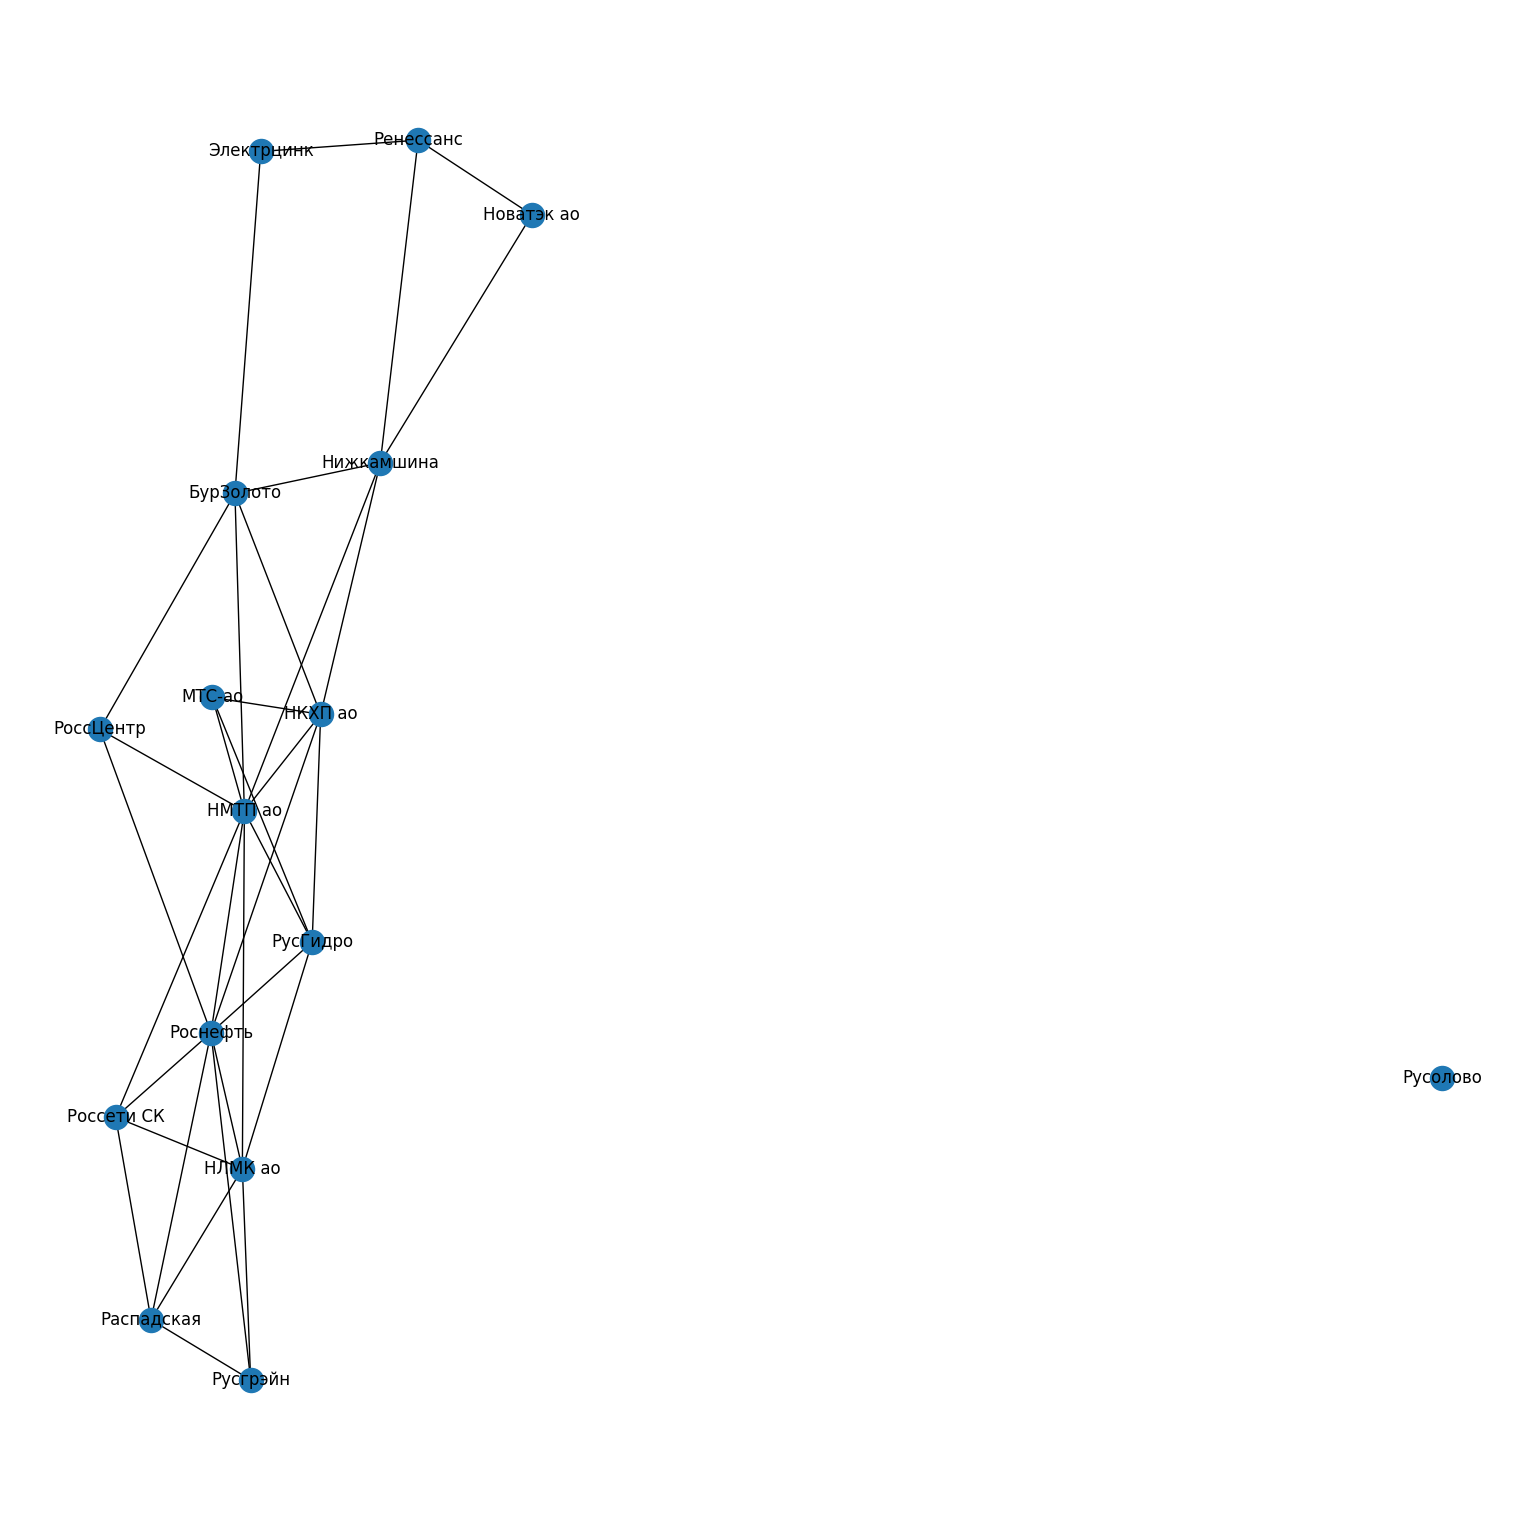

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
layout = nx.layout.spring_layout(G)

nx.draw(G, with_labels=True, pos=layout)
plt.show()